In [3]:
import numpy as np
import logging

import pyLDAvis
import pyLDAvis.gensim 

import warnings

from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary


c:\program files\python36\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
c:\program files\python36\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [4]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [6]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer


In [16]:
import nltk
nltk.download("wordnet")
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
c1= "Human machine interface for lab abc computer applications"
c2 = "A survey of user opinion of computer system response time"
c3 = "The EPS user interface management system"
c4 = "System and human system engineering testing of EPS"
c5 = "Relation of user perceived response time to error measurement"
m1 = "The generation of random binary unordered trees"
m2 = "The intersection graph of paths in trees"
m3 = "Graph minors IV Widths of trees and well quasi ordering"
m4 = "Graph minors A survey"

In [20]:
# compile sample documents into a list
documents = [c1, c2, c3, c4, c5, m1, m2, m3, m4]


In [22]:
# remove common words and tokenize
texts = [[word for word in document.lower().split() if word not in stopwords_en]
         for document in documents]


In [23]:
# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1


In [24]:
texts = [[token for token in text if frequency[token] > 1] for text in texts]

from pprint import pprint  # pretty-printer
pprint(texts)


[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]


In [25]:
dictionary = Dictionary(texts)
print("\n --- dictionary \n",dictionary)
bow_vectors = [dictionary.doc2bow(text) for text in texts]


INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)



 --- dictionary 
 Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...)


In [26]:
goodLdaModel = LdaModel(corpus=bow_vectors,id2word=dictionary,iterations=50,num_topics=2)

INFO:gensim.models.ldamodel:using symmetric alpha at 0.5
INFO:gensim.models.ldamodel:using symmetric eta at 0.5
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 9 documents, updating model once every 9 documents, evaluating perplexity every 9 documents, iterating 50x with a convergence threshold of 0.001000
DEBUG:gensim.models.ldamodel:bound: at document #0
c:\program files\python36\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
c:\program files\python36\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will 

In [31]:
print("\ --- goodLdaModel : all topics in result ordered by significance \n")
all_good_topics = goodLdaModel.print_topics(1)
print(all_good_topics)
print("\n")
print("\ --- goodLdaModel.print_topics(num_topics=2 n num_words=12) : \n")
print(goodLdaModel.print_topics(num_topics=2, num_words=12))

<>:1: DeprecationWarning: invalid escape sequence \ 
<>:5: DeprecationWarning: invalid escape sequence \ 
<>:1: DeprecationWarning: invalid escape sequence \ 
<>:5: DeprecationWarning: invalid escape sequence \ 
<>:1: DeprecationWarning: invalid escape sequence \ 
<>:5: DeprecationWarning: invalid escape sequence \ 
<ipython-input-31-e5286df8430b>:1: DeprecationWarning: invalid escape sequence \ 
  print("\ --- goodLdaModel : all topics in result ordered by significance \n")
<ipython-input-31-e5286df8430b>:5: DeprecationWarning: invalid escape sequence \ 
  print("\ --- goodLdaModel.print_topics(num_topics=2 n num_words=12) : \n")
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.129*"graph" + 0.110*"trees" + 0.110*"user" + 0.093*"system" + 0.091*"time" + 0.089*"minors" + 0.086*"survey" + 0.082*"response" + 0.075*"computer" + 0.050*"interface"
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.129*"graph" + 0.110*"trees" + 0.110*"user" + 0.093*"system" + 0.091*"time" + 0.089*"minors" + 0.08

\ --- goodLdaModel : all topics in result ordered by significance 

[(0, '0.129*"graph" + 0.110*"trees" + 0.110*"user" + 0.093*"system" + 0.091*"time" + 0.089*"minors" + 0.086*"survey" + 0.082*"response" + 0.075*"computer" + 0.050*"interface"')]


\ --- goodLdaModel.print_topics(num_topics=2 n num_words=12) : 

[(0, '0.129*"graph" + 0.110*"trees" + 0.110*"user" + 0.093*"system" + 0.091*"time" + 0.089*"minors" + 0.086*"survey" + 0.082*"response" + 0.075*"computer" + 0.050*"interface" + 0.044*"human" + 0.043*"eps"'), (1, '0.158*"system" + 0.111*"eps" + 0.110*"human" + 0.103*"interface" + 0.083*"user" + 0.082*"trees" + 0.071*"computer" + 0.063*"response" + 0.058*"graph" + 0.058*"survey" + 0.053*"minors" + 0.051*"time"')]


In [34]:
%%time
import warnings
import pandas as pd
import seaborn as sms
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

c:\program files\python36\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
DEBUG:matplotlib:CACHEDIR=C:\Users\HP\.matplotlib
DEBUG:matplotlib.font_manager:font search path ['c:\\program files\\python36\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf', 'c:\\program files\\python36\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\afm', 'c:\\program files\\python36\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\pdfcorefonts']
DEBUG:matplotlib.font_manager:createFontDict: c:\program files\python36\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans-Bold.ttf
DEBUG:matplotlib.font_manager:createFontDict: c:\program files\python36\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXNonUniIta.ttf
DEBUG:matplotlib.font_manager:createFontDict: c:\program files\python36\lib\site-packa

DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\malgun.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\cambriai.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\palabi.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\Roboto-Light.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\Inkfree.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\segoeuiz.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\M Unicode Abeer.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\comicbd.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\courbi.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\Roboto-Italic.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\majallab.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\Candarab.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\sylfaen.ttf
DEBUG

DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\ntailu.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\segoeuisl.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\arialbd.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\consolaz.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\BebasNeue Book.otf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\constanz.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\NirmalaB.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\andlso.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\calibri.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\IndieFlower.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\Roboto-BlackItalic.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\trado.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\WINDOWS\Fonts\Cairo-SemiBold

DEBUG:matplotlib.font_manager:createFontDict: c:\program files\python36\lib\site-packages\matplotlib\mpl-data\fonts\afm\pzcmi8a.afm
DEBUG:matplotlib.font_manager:createFontDict: c:\program files\python36\lib\site-packages\matplotlib\mpl-data\fonts\pdfcorefonts\Times-Italic.afm
DEBUG:matplotlib.font_manager:createFontDict: c:\program files\python36\lib\site-packages\matplotlib\mpl-data\fonts\pdfcorefonts\Helvetica-BoldOblique.afm
DEBUG:matplotlib.font_manager:createFontDict: c:\program files\python36\lib\site-packages\matplotlib\mpl-data\fonts\afm\pbkli8a.afm
DEBUG:matplotlib.font_manager:createFontDict: c:\program files\python36\lib\site-packages\matplotlib\mpl-data\fonts\afm\pcrr8a.afm
DEBUG:matplotlib.font_manager:createFontDict: c:\program files\python36\lib\site-packages\matplotlib\mpl-data\fonts\afm\phvb8a.afm
DEBUG:matplotlib.font_manager:createFontDict: c:\program files\python36\lib\site-packages\matplotlib\mpl-data\fonts\afm\phvbo8an.afm
DEBUG:matplotlib.font_manager:createFont

Wall time: 11.8 s


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('c:\\program files\\python36\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('c:\\program files\\python36\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


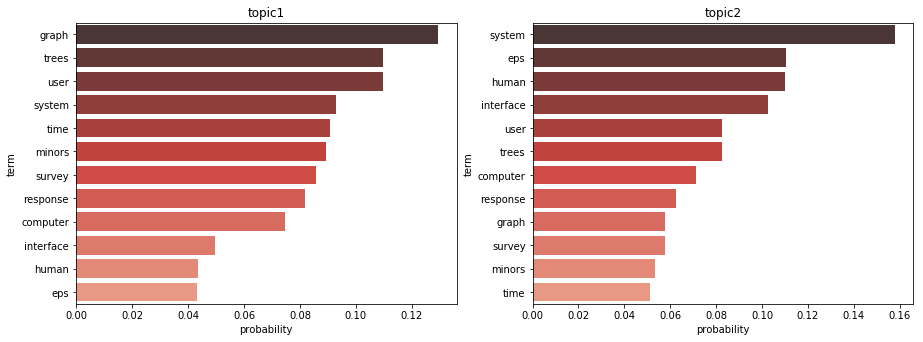

In [36]:
fiz = plt.figure(figsize = (15,30))
for i in range(2):
    df = pd.DataFrame(goodLdaModel.show_topic(i,12), columns=['term','prob']).set_index('term')
    plt.subplot(5,2,i+1)
    plt.title('topic'+str(i+1))
    sms.barplot(x='prob', y=df.index, data=df , label = 'Cities',palette='Reds_d')
    plt.xlabel('probability')
plt.show()